### Задание 0. 

Посчитайте 2 шага градиентного спуска для примера, который мы разбирали на занятии, с учетом свободного коэффициента (то есть, надо посчитать не только градиенты по $w_1$, но и по $w_0$.

Будем считать, что наша выборка состоит из следующих объектов:

 № | x | $y_{true}$ |
| --- | --- | --- |
| 1 | 3 | 7 |
| 2 | 5 | 11 |

Веса инициализируем как $w_1 = 1$ и $w_0 = 0$. Возьмем $\eta = 0.01$.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab as plt


# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [13]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<Axes: >

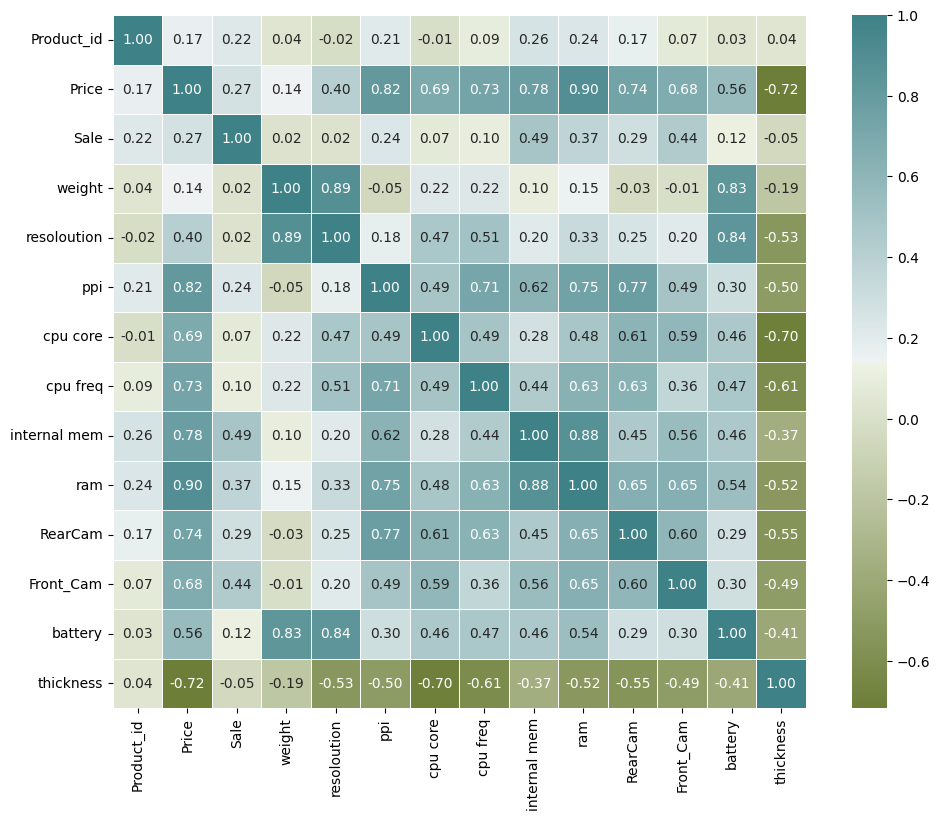

In [14]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [15]:
# сначала убираю данные с низкой корреляцией 

data.drop(['weight', 'resoloution', 'Sale', 'Product_id'], axis=1, inplace=True)


In [16]:
data.info() # нет пустых значений, с типом данных всё нормально

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   ppi           161 non-null    int64  
 2   cpu core      161 non-null    int64  
 3   cpu freq      161 non-null    float64
 4   internal mem  161 non-null    float64
 5   ram           161 non-null    float64
 6   RearCam       161 non-null    float64
 7   Front_Cam     161 non-null    float64
 8   battery       161 non-null    int64  
 9   thickness     161 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 12.7 KB


In [17]:
# масштабирование

X = data.copy().drop('Price', axis=1)

y = data['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain) 
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [18]:
print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))

0.9452349235886908 0.9419433685155438


In [19]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,ppi,195.320876
1,cpu core,126.209897
2,cpu freq,41.727193
3,internal mem,170.897149
4,ram,135.055379
5,RearCam,8.274693
6,Front_Cam,25.506990
7,battery,49.823588
8,thickness,-139.993942


In [20]:
# L1 регуляризация
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.9412819207685683 47985.63475656259
[ 190.59636332  126.35079622   39.86378954  160.95971507  150.38893217
    3.87422422   20.14974604   41.91134828 -136.87955873] 



In [21]:
# разные значения альфа
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.9419487505657663 47440.68758676477
[ 195.21577272  126.28508445   41.7724077   170.89353975  135.18147285
    8.22463545   25.41988993   49.69476    -139.92111818] 

alpha=25.1
Scores: 0.9390683770271582 49794.58870879142
[ 182.51617311  125.72257201   36.52157289  146.6750053   172.60376359
    0.           11.55626016   30.37796805 -132.33843796] 

alpha=50.1
Scores: 0.9324129068486349 55233.5772673419
[ 167.02009531  121.35188843   30.48791571  124.41524602  205.19671019
    0.            0.           12.98353226 -124.68484414] 

alpha=75.1
Scores: 0.9216252433821377 64049.48006517982
[ 154.26144241  111.21962101   24.58952455   99.31130522  231.51612752
    0.            0.            0.         -116.57364217] 



In [23]:
# оптимальное значение параметра регуляризации по кросс-валидации
from sklearn.linear_model import LassoCV

n_alphas = 200 
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17) 
lasso_cv.fit(X, y)

print(f'Best alpha: {lasso_cv.alpha_}')

Best alpha: 10.0


In [24]:
# обучение модели с найденным параметром
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.9448154683368949 0.9412819207685683


In [25]:
# L2 регуляризация

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.9419682454565491 47424.755956831235
[ 194.96776178  126.05773022   41.90217718  170.76337699  135.11654853
    8.52695915   25.62721125   49.85721893 -139.86439922]
alpha=2.6
Scores: 0.9424136166418977 47060.78936747805
[ 187.03293108  122.46379781   45.87037268  167.60256698  136.16794659
   14.31626225   28.5524792    50.76629039 -136.83049814]
alpha=5.1
Scores: 0.9425952921818604 46912.32034023866
[ 180.46419241  119.2581734    49.1952611   164.72126861  136.59022131
   19.25564242   31.28542834   51.72289892 -134.12284352]
alpha=7.6
Scores: 0.9425887622318656 46917.65675109427
[ 174.89628507  116.40228715   52.02585417  162.05740316  136.64046904
   23.51800625   33.80480104   52.65736914 -131.67216919]


In [26]:
from sklearn.linear_model import RidgeCV
# оптимальное значение a по кросс-валидации
n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

print(f'Best alpha: {ridge_cv.alpha_}')

Best alpha: 13.049019780144022


In [27]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.9445203778860997 0.9409477657819624


C L1 результат чуть-чуть лучше.

# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [59]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         150 non-null    object 
 1   Stone        142 non-null    float64
 2   Pounds       142 non-null    float64
 3   Ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


In [61]:
data.drop(['Date'], axis= 1, inplace= True) # решила дропнуть даты

In [62]:
data.isna().sum() 

Stone           9
Pounds          9
Ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [64]:
data = data.dropna()

In [65]:
data['cals_per_oz'] = pd.to_numeric(data['cals_per_oz']) # перевожу значения из object в числа

In [67]:
data = data.fillna(data.mean())

<Axes: >

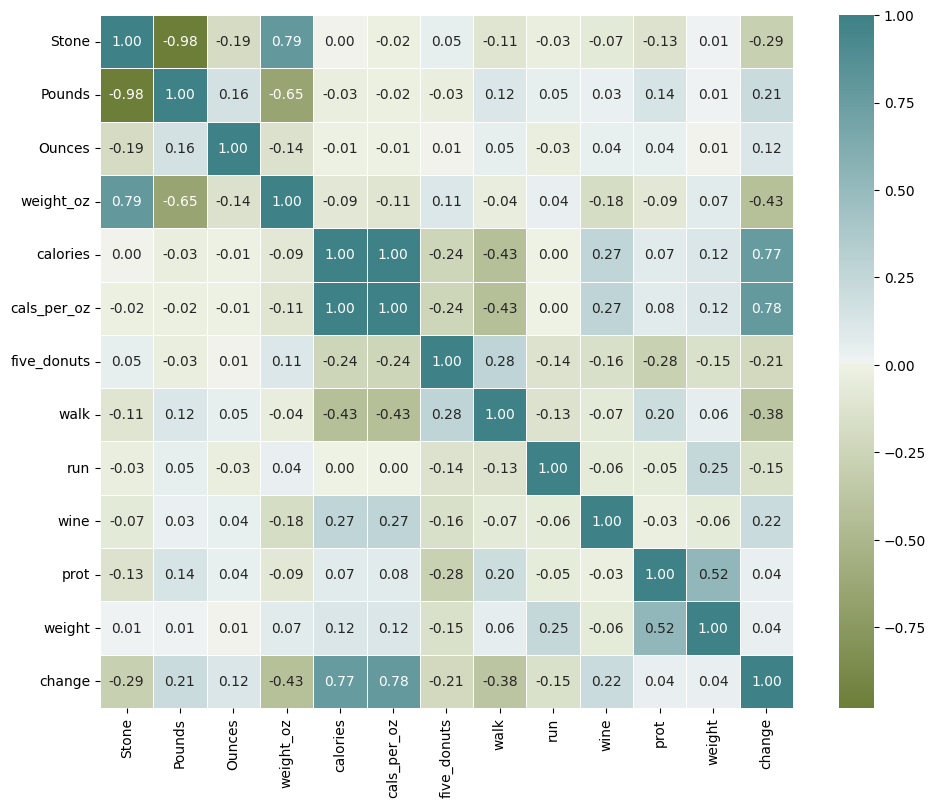

In [68]:
# посмотрим на таблицу корреляций

import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [69]:
data.drop(['Stone', 'Pounds', 'Ounces', 'five_donuts', 'run', 'wine', 'prot', 'weight'], axis= 1, inplace= True) 

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight_oz    140 non-null    float64
 1   calories     140 non-null    float64
 2   cals_per_oz  140 non-null    float64
 3   walk         140 non-null    float64
 4   change       140 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [71]:
# масштабирование

X = data.copy().drop('change', axis=1)

y = data['change']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain) 
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'Коэффициенты: {coefficients}')

# L1 регуляризация
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

# разные значения альфа
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

# оптимальное значение параметра регуляризации по кросс-валидации
from sklearn.linear_model import LassoCV

n_alphas = 200 
alphas = np.linspace(0.1, 10, n_alphas) 

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

print(f'Best alpha:{lasso_cv.alpha_}')

# обучение модели с найденным параметром
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

# L2 регуляризация

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)


# оптимальное значение a по кросс-валидации
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

print(f'Best alpha: {ridge_cv.alpha_}')

# обучение
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))


0.7693680169341837 0.49248424051504636
Коэффициенты:              0          0
0    weight_oz  -7.557315
1     calories -61.136676
2  cals_per_oz  79.008994
3         walk  -3.473268
Scores: 0.2287948154547239 406.3897197723967
[-0.          0.         10.15387281 -0.        ] 

alpha=0.1
Scores: 0.5115425072762785 257.39466949481704
[-8.83704657  7.39264707 10.34987159 -3.26724765] 

alpha=25.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0.  0. -0.] 

alpha=50.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0.  0. -0.] 

alpha=75.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0.  0. -0.] 

Best alpha:0.7964824120603016
Scores: 0.7662871084824737 0.5173957183273286
alpha=0.1
Scores: 0.5093486713640325 258.5507202832073
[-8.87182658  4.50125707 13.28676898 -3.35759231]
alpha=2.6
Scores: 0.5109277636355498 257.7186111654567
[-8.77508681  8.54808228  9.06102171 -3.33799186]
alpha=5.1
Scores: 0.5112746008973139 257.5358438547078
[-8.60423703  8.55058179  8.88761217 -3.

d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.292e+00, tolerance: 7.072e+00
  model = cd_fast.enet_coordinate_descent(


Best alpha: 14.992684327860456
Scores: 0.2872913405810069 0.059542559862638234


Результат немного улучшился после L1 и нахождения лучшего альфа по кросс-валидации (0.5173957183273286 на тесте), но всё равно не очень 

In [72]:
# решила ещё попробовать ElasticNet на всякий случай 
from sklearn.linear_model import ElasticNet

np.random.seed(0)
X = data.copy().drop('change', axis=1)

y = data['change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5) 
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Mean Squared Error: 147.39526667172845
Scores: 0.2872913405810069 0.059542559862638234


# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [95]:
data = pd.read_csv('Life Expectancy Data.csv')
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1039,Greece,2002,Developing,79.0,81.0,1,8.09,160.889726,91.0,5,...,92.0,8.72,92.0,0.1,1411.313390,19222.0,0.8,0.8,0.811,14.6
1537,Lithuania,2000,Developed,71.6,2.0,0,9.87,373.260553,98.0,19,...,92.0,6.46,94.0,0.1,3297.354710,3499536.0,3.4,3.4,0.745,14.0
2586,The former Yugoslav republic of Macedonia,2014,Developing,75.5,12.0,0,1.13,0.000000,97.0,116,...,96.0,6.48,95.0,0.1,NaN,NaN,2.2,2.2,0.743,12.9
314,Bolivia (Plurinational State of),2005,Developing,65.7,222.0,12,2.86,0.000000,85.0,0,...,84.0,5.67,85.0,0.2,NaN,NaN,1.3,1.2,0.622,14.4
2557,Tajikistan,2011,Developing,68.1,166.0,10,0.32,51.991923,96.0,1,...,97.0,5.98,96.0,0.2,834.541295,7815949.0,3.7,3.7,0.608,11.1
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
1219,Iran (Islamic Republic of),2014,Developing,75.4,83.0,19,0.01,0.000000,99.0,99,...,99.0,6.89,99.0,0.1,NaN,NaN,8.3,8.4,0.770,14.9
1722,Mongolia,2009,Developing,66.9,235.0,1,4.61,134.167893,97.0,8,...,96.0,5.29,95.0,0.1,1717.898761,2668289.0,2.2,2.3,0.686,13.8
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,121427132.0,27.0,27.8,0.563,10.5
136,Austria,2007,Developed,81.0,8.0,0,12.50,7453.864400,85.0,20,...,85.0,1.40,85.0,0.1,46586.652500,8295487.0,1.7,1.9,0.860,15.2


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [97]:
set(data.Status)

{'Developed', 'Developing'}

In [98]:
data['Status'] = data.apply(lambda x : 0 if x['Status'] == 'Developing' else 1, axis = 1)

In [99]:
categ_columns = data.select_dtypes(['object']).columns
data[categ_columns] = data[categ_columns].apply (lambda x: pd.factorize(x)[0])

In [100]:
data.corr().style.background_gradient(cmap='coolwarm')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001350,0.032439,-0.013489,0.036259,-0.030985,-0.061251,-0.032465,-0.019762,-0.024164,0.019106,-0.027014,0.018616,0.055423,-0.005559,0.089229,-0.017104,-0.016866,0.007229,0.021881,-0.024661,-0.026431
Year,0.001350,1.000000,-0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,0.032439,-0.001864,1.000000,0.482136,-0.315284,-0.112252,0.596660,0.454261,0.115317,-0.076955,0.311257,-0.115195,0.220250,0.299990,0.216913,-0.148590,0.478339,-0.045801,-0.368389,-0.366751,0.478402,0.514045
Life expectancy,-0.013489,0.170033,0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,0.036259,-0.079052,-0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.030985,-0.037415,-0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.061251,-0.052990,0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,-0.032465,0.031400,0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,-0.019762,0.104333,0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.024164,-0.082493,-0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225


In [101]:
data.isna().sum() 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [105]:
data.drop(['Country', 'Year', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Total expenditure', 'Population'], axis=1, inplace=True) 

In [117]:
data.drop(['Measles ', 'under-five deaths '], axis=1, inplace=True)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   Alcohol                          2744 non-null   float64
 4    BMI                             2904 non-null   float64
 5   Polio                            2919 non-null   float64
 6   Diphtheria                       2919 non-null   float64
 7    HIV/AIDS                        2938 non-null   float64
 8   GDP                              2490 non-null   float64
 9    thinness  1-19 years            2904 non-null   float64
 10   thinness 5-9 years              2904 non-null   float64
 11  Income composition of resources  2771 non-null   float64
 12  Schooling           

In [119]:
data = data.fillna(data.mean())

In [120]:
# теперь попробуем обучить
# масштабирование

X = data.copy().drop('Life expectancy ', axis=1)

y = data['Life expectancy ']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain) 
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(coefficients)

# L1 регуляризация
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

# разные значения альфа
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

# оптимальное значение параметра регуляризации по кросс-валидации
from sklearn.linear_model import LassoCV

n_alphas = 200 
alphas = np.linspace(0.1, 10, n_alphas) 

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)  
lasso_cv.fit(X, y)

print(f'Best alpha:{lasso_cv.alpha_}')

# обучение модели с найденным параметром
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores with the best alpha (L1):', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

# L2 регуляризация

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)


# оптимальное значение a по кросс-валидации
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

print(f'Best alpha: {ridge_cv.alpha_}')

# learning
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores with the best alpha (L2):', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))


0.8026503967266898 0.8251546945670394
                                  0         0
0                            Status  0.661964
1                   Adult Mortality -2.555923
2                           Alcohol  0.075169
3                              BMI   0.963333
4                             Polio  0.725824
5                       Diphtheria   1.079405
6                          HIV/AIDS -2.344592
7                               GDP  0.533975
8              thinness  1-19 years -0.470436
9                thinness 5-9 years  0.019744
10  Income composition of resources  1.197590
11                        Schooling  2.270105
Scores: -0.00010661200804129578 87.064474277972
[ 0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.] 

alpha=0.1
Scores: 0.8257033385726759 15.173429525785037
[ 0.64711912 -2.54340381  0.02649967  0.9369657   0.68885274  1.04624949
 -2.28047618  0.48389927 -0.42498605 -0.          1.19385512  2.2968846 ] 

alpha=25.1
Scores: -0.00010661200804129578 87.064474277972


В принципе, все результаты несильно различаются, кроме L2